# Music Genre Classification based on MSD genre dataset

## Define the problem

### Problem Stateement

The aim of this project is to examine the possibility to automatically classify tracks ito genres, solely by using the infoermation derived from an acoustic analysis. We are considering a 10-genre classification problem with the following categories: classic pop and rock; classical; dance and electronics; fold; hip-hop; jazz and blues; metal, pop; punk; soul and reggae. The features we will use for classification are timbre, tempo, loudness information, time signature, key and mode.

Streaming or broadcasting websites rely on metadata to organize their musical content for easier search and access by the users. A metadata is simply information about the song – album name, artist name, song name, year of publication, genre, etc. While most of the information can easily be extracted from the title of the song, the genre is one of the important features that cannot be easily determined. A lot of the online musical content though lacks this important piece of information. Some websites like Spotify use manual (human) classification of the songs on their website. With the explosion of the musical content online categorizing songs manually can soon become unrealistic. Automatic genre classification would make this process much easier and faster, and it would also improve the quality of the music recommendations. Finally, it will allow for local artists to reach to a greater audience on the web.

The dataset we used here has been downloaded from thee link http://millionsongdataset.com/sites/default/files/AdditionalFiles/msd_genre_dataset.zip

In [1]:
# Import libraries
import warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = "../data/raw/msd_genre_dataset.txt"

In [3]:
genre_df = pd.read_csv(DATA_PATH)

In [4]:
genre_df.head()

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,...,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,...,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


## Data Source

Our study is based on the Million Song Dataset, which is a freely-available collection of audio features and metadata for one million contemporary popular music tracks. The data was contributed by The Echo Nest, a music intelligence and data platform for developers and media companies, and sponsored by the National Science Foundation. For the scope of this project, a subset of the data set is considered – only 59,600 songs.
The data set contains the following information:
- Song ID, title, artist name
- Genre - 10 categories: classic pop and rock, folk, dance and electronica, jazz and blues, soul and reggae, punk,  metal, classical, pop, hip-hop
- Loudness (numerical, from -40 to 0)
- Tempo (numerical, from 0 to 255)
- Time signature (categorical, from 0 to 7)
- Key (categorical, from 0 to 11)
- Mode (binary, 0 or 1)
- Duration (numerical)
- Average and variance of timbre vectors (numerical) – 12 variables for each (24 in total)



In [5]:
genre_df.shape

(59600, 34)

# Exploratory data analysis and Visualization

First let us check is whether there is any null value in the dataset, if there is any we need to impute them.

In [6]:
genre_df.isnull().sum()

genre             0
track_id          0
artist_name       0
title             0
loudness          0
tempo             0
time_signature    0
key               0
mode              0
duration          0
avg_timbre1       0
avg_timbre2       0
avg_timbre3       0
avg_timbre4       0
avg_timbre5       0
avg_timbre6       0
avg_timbre7       0
avg_timbre8       0
avg_timbre9       0
avg_timbre10      0
avg_timbre11      0
avg_timbre12      0
var_timbre1       0
var_timbre2       0
var_timbre3       0
var_timbre4       0
var_timbre5       0
var_timbre6       0
var_timbre7       0
var_timbre8       0
var_timbre9       0
var_timbre10      0
var_timbre11      0
var_timbre12      0
dtype: int64

This shows that the dataset does not contain any null values.

In [7]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59600 entries, 0 to 59599
Data columns (total 34 columns):
genre             59600 non-null object
track_id          59600 non-null object
artist_name       59600 non-null object
title             59600 non-null object
loudness          59600 non-null float64
tempo             59600 non-null float64
time_signature    59600 non-null int64
key               59600 non-null int64
mode              59600 non-null int64
duration          59600 non-null float64
avg_timbre1       59600 non-null float64
avg_timbre2       59600 non-null float64
avg_timbre3       59600 non-null float64
avg_timbre4       59600 non-null float64
avg_timbre5       59600 non-null float64
avg_timbre6       59600 non-null float64
avg_timbre7       59600 non-null float64
avg_timbre8       59600 non-null float64
avg_timbre9       59600 non-null float64
avg_timbre10      59600 non-null float64
avg_timbre11      59600 non-null float64
avg_timbre12      59600 non-null float64

Apart from `genre`, `track_id`, `artist_name` ad `title`, rest of the varuables are in numeric.

Now we want to see is the distribution of target classes. 

Class = classic pop and rock, 	 Count = 23895, 	Percentage = 40.092
Class = punk, 	 Count = 3200, 	Percentage = 5.369
Class = folk, 	 Count = 13192, 	Percentage = 22.134
Class = pop, 	 Count = 1617, 	Percentage = 2.713
Class = dance and electronica, 	 Count = 4935, 	Percentage = 8.280
Class = metal, 	 Count = 2103, 	Percentage = 3.529
Class = jazz and blues, 	 Count = 4334, 	Percentage = 7.272
Class = classical, 	 Count = 1874, 	Percentage = 3.144
Class = hip-hop, 	 Count = 434, 	Percentage = 0.728
Class = soul and reggae, 	 Count = 4016, 	Percentage = 6.738


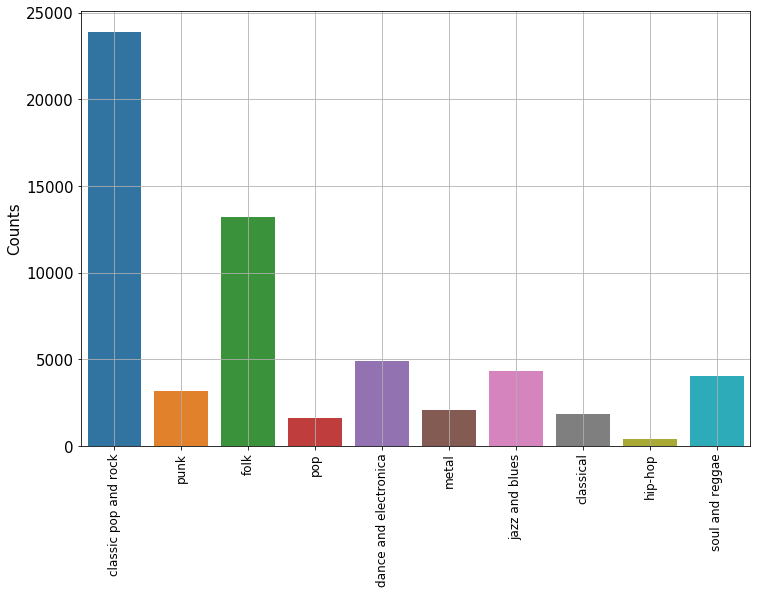

In [8]:
counter = Counter(genre_df["genre"])
g_name= list()
g_count = list()

for k,i in counter.items():
    per = i / len(genre_df["genre"]) * 100
    print(f"Class = {k}, \t Count = {i}, \tPercentage = {per:.3f}")
    g_name.append(k)
    g_count.append(i)
plt.figure(figsize=(12,8))    
sns.barplot(x=g_name, y=g_count, data=genre_df)
plt.grid(True)
plt.ylabel("Counts", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.savefig("../reports/figures/class_counts.png", bbox_inches='tight')
plt.show()

This is crucial part of this dataset. We can see that one of the main problems of this dataset is its imbalancedness and skewdness. The **classic pop and rock** class, for example, is represented by 23,895 tracks, while the 'hip-hop' one has 434 tracks. In this case, we need to pay attetion to this imbalancedeess in terms of implemenntation of algorithms.

In [9]:
def rain_cloud_plot(X, Y, df):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle(Y.title() + " by Genre", fontsize= 20) # Add the text/suptitle to figure
    fig.subplots_adjust(top=.9) # adjust the placing of subplot, adjust top, bottom, left and right spacing  
    pt.RainCloud(x=X, y=Y,
                      data=df,
                      width_viol= 1,
                      width_box= .4,
                     orient='h')
    plt.savefig("../reports/figures/"+Y+"_plot.png", bbox_inches='tight')
    plt.show()

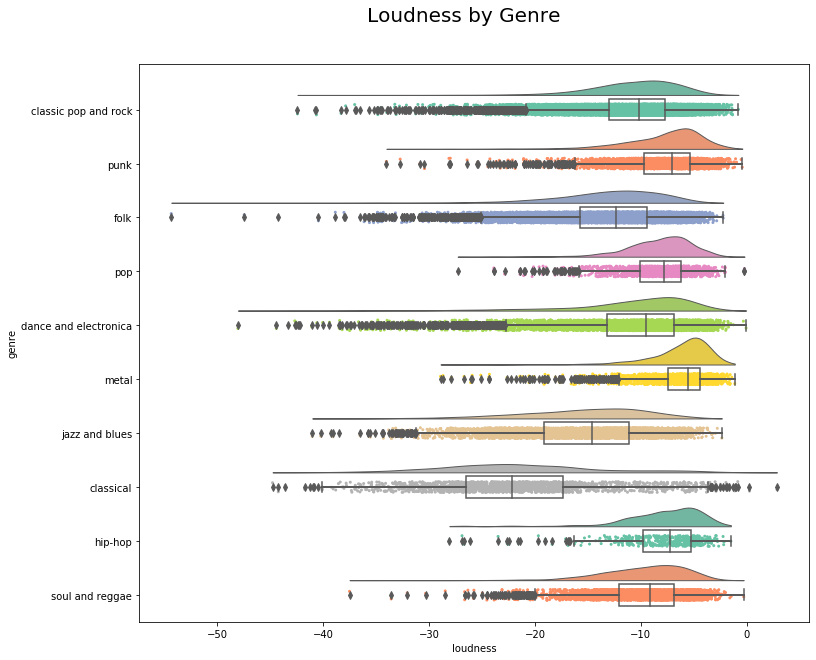

In [10]:
rain_cloud_plot("genre","loudness", genre_df)

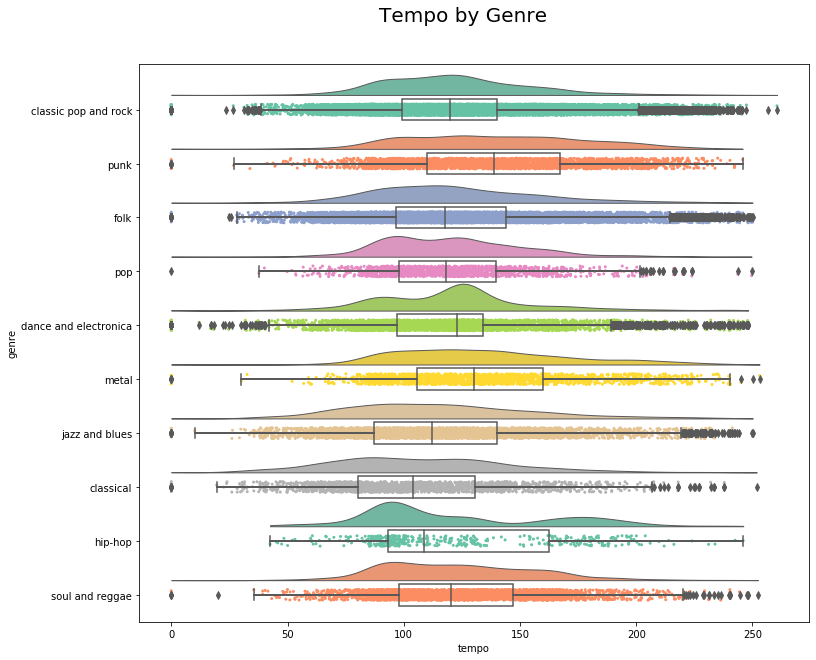

In [11]:
rain_cloud_plot("genre","tempo", genre_df)

In [12]:
# Eliminate `track_id` from the dataset
genre_df = genre_df.drop(columns=["track_id", "artist_name", "title"],axis=0)
genre_df.head()

,genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,...,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,...,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152


In [13]:
def corr_heatmap(df):
    # Correlation matrix
    sns.set(style='white')
    corr = df.corr()
    # Generate a mask fo rthe upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True# Set up matplotlib figure for correlation matrix
    f , ax = plt.subplots(figsize=(18, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.show()

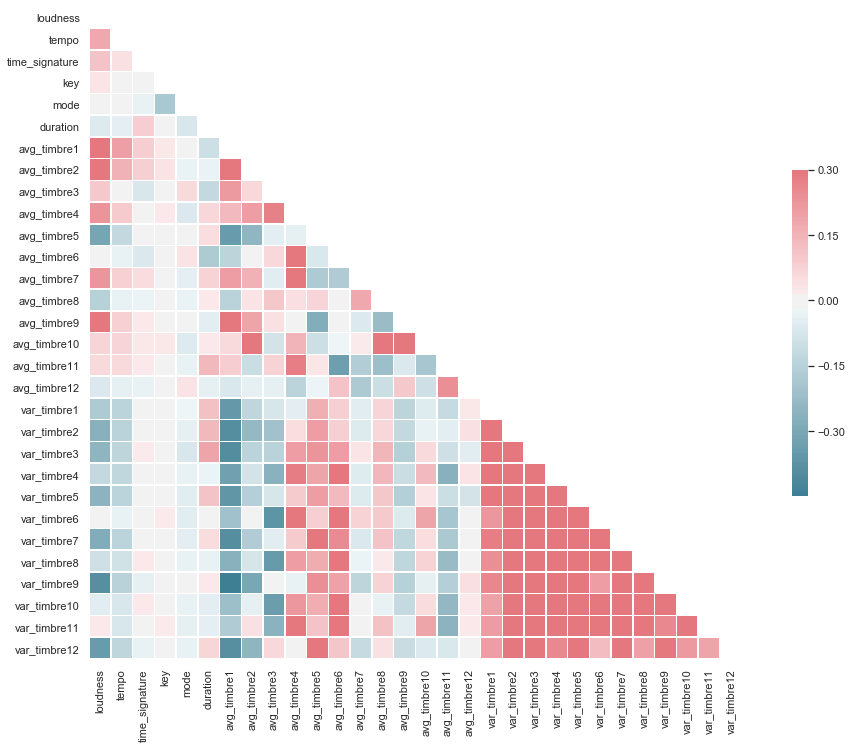

In [14]:
corr_heatmap(genre_df)

We consider all of the above variables except for  title and contributing artist as
our prediction variables for developing the model.

## Establish a baseline model

In [39]:
# Import necessary modules for model implementation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [16]:
features = genre_df.drop(["genre"], axis=1)

In [17]:
target = genre_df.genre

In [18]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2)

### Evaluate algorithms: Baseline

In [19]:
# Test option and evaluate metric
num_folds = 10
seed = 2020
np.random.seed(seed)
scoring = 'accuracy'

In [40]:
# Spot-Check algorithm
def get_models():
    models = []
    names = []
    
    models.append(KNeighborsClassifier())
    names.append('KN')
    
    models.append(RandomForestClassifier())
    names.append('RF')
    
    models.append(GradientBoostingClassifier())
    names.append('HGB')
                                
    return models, names

In [41]:
models, names = get_models()

In [42]:
# Evaluate algorithms using cross validation
def evaluate_models_cv(X, y, models):
    cv = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=3, random_state=seed)
    scores = cross_val_score(models, X, y, scoring=scoring, cv=cv)
    return scores

In [27]:
for i in range(len(models)):
    scores = evaluate_models_cv(features, target, models[i])
    print(f"{names[i]}: {np.mean(scores)}")

KN: 0.43629835266830247
RF: 0.5563919525040075
HGB: 0.6157505555785814


In [28]:
# Evaluate algorithms using test harness
def evaluate_model_testset(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    ac_score = accuracy_score(y_test, y_pred)
    return ac_score

In [29]:
for i in range(len(models)):
    scores = evaluate_model_testset(models[i])
    print(f"{names[i]}: {scores}")

KN: 0.44110738255033555
RF: 0.5602348993288591
HGB: 0.615520134228188


In [32]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features, target)

In [33]:
Counter(y_res)

Counter({'classic pop and rock': 23895,
         'punk': 23895,
         'folk': 23895,
         'pop': 23895,
         'dance and electronica': 23895,
         'metal': 23895,
         'jazz and blues': 23895,
         'classical': 23895,
         'hip-hop': 23895,
         'soul and reggae': 23895})

In [34]:
for i in range(len(models)):
    scores = evaluate_models_cv(X_res, y_res, models[i])
    print(f"{names[i]}: {np.mean(scores)}")

KN: 0.8632377085117574
RF: 0.8453248028358709
HGB: 0.7761081257483596


In [35]:
from imblearn.over_sampling import ADASYN

In [36]:
ada = ADASYN(random_state=42)
X_aes, y_aes = ada.fit_resample(features, target)

In [37]:
Counter(y_aes)

Counter({'classic pop and rock': 23895,
         'punk': 23470,
         'folk': 22849,
         'pop': 24222,
         'dance and electronica': 25283,
         'metal': 23941,
         'jazz and blues': 24358,
         'classical': 24216,
         'hip-hop': 23990,
         'soul and reggae': 23752})

In [43]:
for i in range(len(models)):
    scores = evaluate_models_cv(X_aes, y_aes, models[i])
    print(f"{names[i]}: {np.mean(scores)}")

KN: 0.8612791533962891
RF: 0.8407535006103802
HGB: 0.6350981900424392


### Optimization of parameters

Many strategies exist on how to tune parameters. Most data scientists see *learning rate*, *maximum number of iteration*, *maximum depth of each tree* as important parameters.

Here I will use 5-fold cross validation and evaluate models based on accuracy.

#### Tuninng Histogram-based Gradient Boosting Classifier

In [30]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [31]:
# building model by using parameter got from grid search
#parameters to tune
parameters = {
 'learning_rate': [0.15,0.1,0.05,0.01,0.005,0.001],
 'max_iter': [1000,1200,1500],
 'max_depth' : [25, 50, 75],
 'l2_regularization': [1.5],
 'scoring': ['accuracy'],
 'random_state' : [10],
 }

In [32]:
#instantiate the gridsearch
hgb_grid = GridSearchCV(estimator=HistGradientBoostingClassifier(), 
                        param_grid=parameters, n_jobs=5, 
                        cv=5, scoring='accuracy', verbose=2,
                        refit=True)

In [33]:
hgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 35.6min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 157.3min
[Parallel(n_jobs=5)]: Done 270 out of 270 | elapsed: 279.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=HistGradientBoostingClassifier(l2_regularization=0.0,
                                                      learning_rate=0.1,
                                                      loss='auto', max_bins=256,
                                                      max_depth=None,
                                                      max_iter=100,
                                                      max_leaf_nodes=31,
                                                      min_samples_leaf=20,
                                                      n_iter_no_change=None,
                                                      random_state=None,
                                                      scoring=None, tol=1e-07,
                                                      validation_fraction=0.1,
                                                      verbose=0),
             iid='warn', n_jobs=5,
             param_gri

In [34]:
print(hgb_grid.best_params_)

{'l2_regularization': 1.5, 'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1500, 'random_state': 10, 'scoring': 'accuracy'}


In [35]:
print(hgb_grid.best_score_)

0.6339555369127516


## Evaluation of final model on Test Set

The final model performs may change slightly than the model after the first stage of parameter tuning if applied to the test set. The difference is, however, very small.

In [48]:
final_model = HistGradientBoostingClassifier(l2_regularization=1.5, 
                                             learning_rate=0.1, 
                                             max_depth=25, 
                                             max_iter=1500,
                                             random_state=10)

In [49]:
final_model.fit(X_train,y_train)

HistGradientBoostingClassifier(l2_regularization=1.5, learning_rate=0.1,
                               loss='auto', max_bins=256, max_depth=25,
                               max_iter=1500, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=10, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0)

In [52]:
y_pred_hgb = final_model.predict(X_test)
print(classification_report(y_test, y_pred_hgb))

                       precision    recall  f1-score   support

 classic pop and rock       0.61      0.81      0.69      4816
            classical       0.83      0.73      0.78       383
dance and electronica       0.62      0.51      0.56       979
                 folk       0.66      0.64      0.65      2588
              hip-hop       0.58      0.16      0.25        90
       jazz and blues       0.74      0.49      0.59       873
                metal       0.88      0.66      0.75       453
                  pop       0.51      0.11      0.18       309
                 punk       0.71      0.47      0.57       638
      soul and reggae       0.60      0.34      0.44       791

             accuracy                           0.64     11920
            macro avg       0.67      0.49      0.54     11920
         weighted avg       0.65      0.64      0.63     11920



In [44]:
categories = genre_df["genre"].unique()

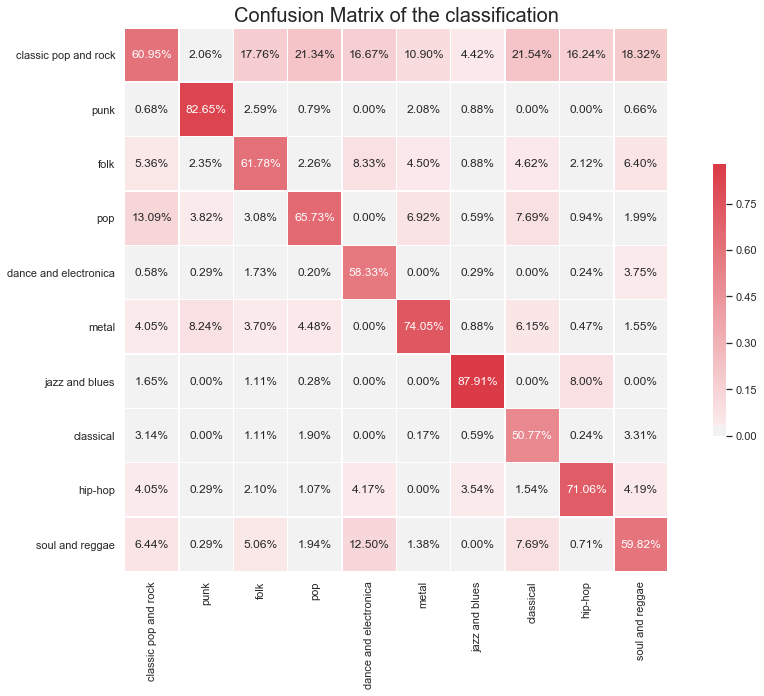

In [55]:
cm = confusion_matrix(y_test, y_pred_hgb)
cm_df = pd.DataFrame(cm, columns=np.asarray(categories), index=np.asarray(categories))
f , ax = plt.subplots(figsize=(16, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cm_df/np.sum(cm_df),cmap=cmap, square=True, center=0, linewidths=.5, annot=True,fmt='.2%', cbar_kws={"shrink": .5})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix of the classification", fontsize=20)
plt.savefig("../reports/figures/confusion-matrix.png", bbox_inches='tight')
plt.show()

As the results show the classification only achieved average accuracy of 64% at best, which we believe is a rather poor, but a reliable result. Again, from the confusion matrix we can see that some tracks are really well-classified. Yet, using this classifier in practice in an application would lead to a lot of misclassified tracks.